<a href="https://colab.research.google.com/github/DiegoRuP/Encriptador-de-texto/blob/main/tallerIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema

## Analisis de dataset "Cyber Security Attacks"

El problema que abordaremos será la identificación de los tipos de ataques, estos ataques recopilados son **Malware**, **DDoS** e **Intrusión**, cada uno una cantidad distinta de severidad o gravedad desde **baja**, **media** y **alta**. Podemos además conocer su ubicación geografica para conocer en que zona del planeta se concentran mayor cantidad de ataques.

La base de datos que empleamos está disponible en [Kaggle - Cyber Security Attacks](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks?resource=download).

## Formulación de pregunta o hipótesis


- $H_0$: **Existe** una correlación significativa entre el tipo de ataque y el nivel de severidad.
- $H_A$: **No existe** una correlación significativa entre el tipo de ataque y el nivel de severidad.

Considere que en la base de datos:
- El tipo de ataque esta codificado por **Attack.Type.Num**
- La severidad de ataque está codificado por **Severity.Level.Num**

## Objetivo

Determinar la correlación entre los **tipos de ataques** con el **grado de severidad**.

## Equipo

- Diana Paola Narváez Martínez
- Diego Ruan Padilla



# Carga de librerías

In [ ]:
#install.packages("tidyverse")
#install.packages("psych")

library(tidyverse, psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘lazyeval’, ‘crosstalk’, ‘productplots’, ‘plotly’, ‘ggrepel’




# Carga de datos

## Lectura de la base de datos y asignación a las columnas

Se realizó la lectura de nuestro archivo y se asigna a una variable df, posterior a eso se realiza una variable

In [ ]:
df <- read.csv("/content/cybersecurity_attacks.csv")
attach(df)

The following objects are masked from df (pos = 3):

    Action.Taken, Alerts.Warnings, Anomaly.Scores, Attack.Signature,
    Attack.Type, Destination.IP.Address, Destination.Port,
    Device.Information, Firewall.Logs, Geo.location.Data,
    IDS.IPS.Alerts, Log.Source, Malware.Indicators, Network.Segment,
    Packet.Length, Packet.Type, Payload.Data, Protocol,
    Proxy.Information, Severity.Level, Source.IP.Address, Source.Port,
    Timestamp, Traffic.Type, User.Information


The following objects are masked from df (pos = 4):

    Action.Taken, Alerts.Warnings, Anomaly.Scores, Attack.Signature,
    Attack.Type, Destination.IP.Address, Destination.Port,
    Device.Information, Firewall.Logs, Geo.location.Data,
    IDS.IPS.Alerts, Log.Source, Malware.Indicators, Network.Segment,
    Packet.Length, Packet.Type, Payload.Data, Protocol,
    Proxy.Information, Severity.Level, Source.IP.Address, Source.Port,
    Timestamp, Traffic.Type, User.Information


The following objects are masked f

# Análisis

A continuación podemos denotar las variables contenidas dentro de la base de datos.

In [ ]:
names(df)

[1] "Timestamp"              "Source.IP.Address"      "Destination.IP.Address"
 [4] "Source.Port"            "Destination.Port"       "Protocol"              
 [7] "Packet.Length"          "Packet.Type"            "Traffic.Type"          
[10] "Payload.Data"           "Malware.Indicators"     "Anomaly.Scores"        
[13] "Alerts.Warnings"        "Attack.Type"            "Attack.Signature"      
[16] "Action.Taken"           "Severity.Level"         "User.Information"      
[19] "Device.Information"     "Network.Segment"        "Geo.location.Data"     
[22] "Proxy.Information"      "Firewall.Logs"          "IDS.IPS.Alerts"        
[25] "Log.Source"

Realizamos un ajuste de los datos para obtener variables numericas a traves de las categoricas y guardamos en otra df, los cuales equivalen a lo siguiente:

*Tipo de ataque:*

- 0 - Malware
- 1 - DDoS
- 2 - Intrusión

*Nivel de severidad*

- 0 - Low
- 1 - Medium
- 2 - High







In [ ]:
df2 <- df %>%
  mutate(Attack.Type.Num = case_when(
    Attack.Type == "Malware" ~ 0,
    Attack.Type == "DDoS" ~ 1,
    Attack.Type == "Intrusion" ~ 2,
    TRUE ~ 3
  )) %>%
    mutate(Severity.Level.Num = case_when(
    Severity.Level == "Low" ~ 0,
    Severity.Level == "Medium" ~ 1,
    Severity.Level == "High" ~ 2,
    TRUE ~ 3
    )) %>%
      select(Timestamp,Attack.Type.Num,Severity.Level.Num, Geo.location.Data)
attach(df2)

The following objects are masked from df (pos = 3):

    Geo.location.Data, Timestamp


The following objects are masked from df (pos = 4):

    Geo.location.Data, Timestamp


The following objects are masked from df (pos = 5):

    Geo.location.Data, Timestamp


The following objects are masked from df (pos = 6):

    Geo.location.Data, Timestamp


The following objects are masked from df (pos = 18):

    Geo.location.Data, Timestamp




Una muestra de los datos despues de utilizar la funcion mutate()

In [ ]:
df2 %>%
  head()

,Timestamp,Attack.Type.Num,Severity.Level.Num,Geo.location.Data
,<chr>,<dbl>,<dbl>,<chr>
1,2023-05-30 06:33:58,0,0,"Jamshedpur, Sikkim"
2,2020-08-26 07:08:30,0,0,"Bilaspur, Nagaland"
3,2022-11-13 08:23:25,1,0,"Bokaro, Rajasthan"
4,2023-07-02 10:38:46,0,1,"Jaunpur, Rajasthan"
5,2023-07-16 13:11:07,1,0,"Anantapur, Tripura"
6,2022-10-28 13:14:27,0,1,"Aurangabad, Meghalaya"


Realizamos un analisis de frecuencias para verificar correlación de la severidad de los ataques y el tipo de ataque

In [ ]:
table(Attack.Type.Num, Severity.Level.Num)

               Severity.Level.Num
Attack.Type.Num    0    1    2
              0 4359 4516 4432
              1 4450 4455 4523
              2 4374 4464 4427

Con el método de correlación de Spearman podemos determinar que el tipo de ataque y el nivel de severidad están muy débilmente relacionados, siendo prácticamente nula la relación con un valor de correlación de -0.0007.

In [ ]:
cor(x = Attack.Type.Num, y = Severity.Level.Num, method = "spearman")

[1] -0.000739411

Obtenemos un grafico de la cantidad de ataques por nivel de severidad

- ¿Existe una correlación significativa entre el tipo de ataque y la severidad del incidente, y cómo varía esta relación entre diferentes tipos de ataques?

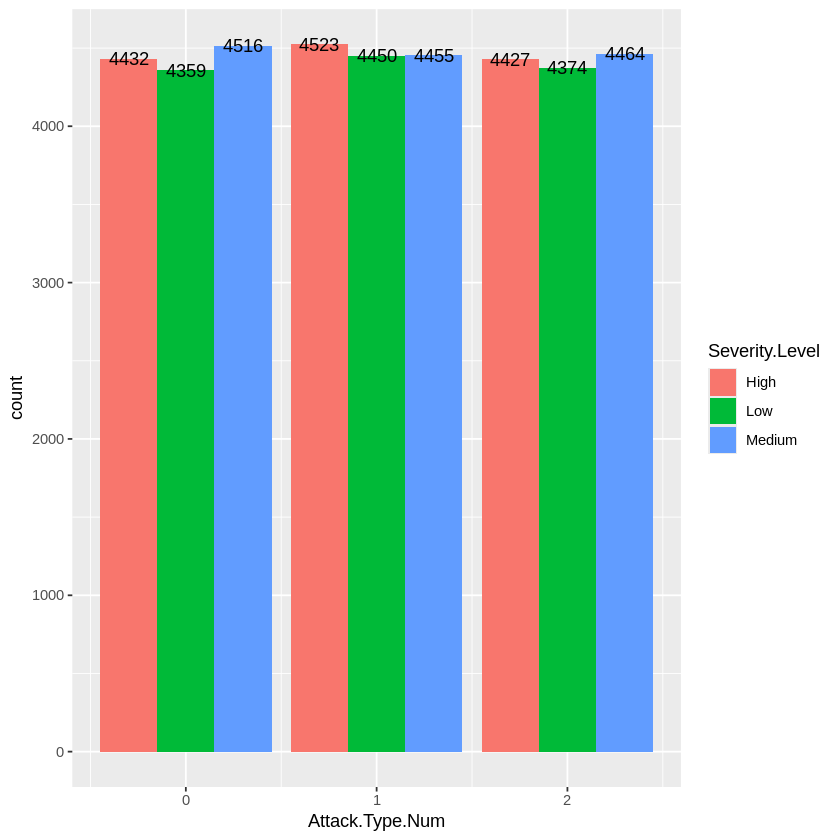

In [ ]:
ggplot(data = df2, aes(x = Attack.Type.Num, fill = Severity.Level)) +
    geom_bar(position = "dodge") +
      stat_count(geom = "text",
             aes(label = after_stat(count)),
             position = position_dodge(width = 0.9), colour = "black")

Para mayor comprensión obtenemos una pequeña descripcion de nuestros datos y podemos observar el promedio o mean.

In [ ]:
describe(df2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Timestamp*,1,40000,19999.394525,1.154594e+04,20000.5,1.999949e+04,14823.7761,1,39997,39996,-9.502404e-05,-1.200009,57.729711314
Attack.Type.Num,2,40000,0.998950,8.150555e-01,1.0,9.986875e-01,1.4826,0,2,2,1.925450e-03,-1.494726,0.004075278
Severity.Level.Num,3,40000,1.004975,8.149336e-01,1.0,1.006219e+00,1.4826,0,2,2,-9.121799e-03,-1.494223,0.004074668
Geo.location.Data*,4,40000,4344.817325,2.522395e+03,4329.0,4.341517e+03,3243.1875,1,8723,8722,9.880114e-03,-1.202552,12.611976673
